In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Remove Outliers

In [10]:
def outlier_detection(df):
    # Detecting the Null or NaN values and remo ving them first
    # to ensure that the numerical columns can be detected correctly.
    r = []
    for col in df.columns:
        for i in df.index:
            if df.loc[i, col]=='Null' or df.loc[i, col] == np.nan:
                r.append(i)
    df = df.drop(list(set(r)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    
    # Finding out the columns having numerical values.
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                num_cols.append(col)
            except ValueError:
                pass
          
    # Removing the rows having values which can be called outliers
    # on the basis of their z-scores of >3 or <-3
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    print(count)
    return df

In [11]:
df = outlier_detection(df)

0


### Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


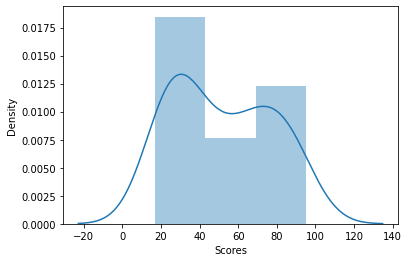

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


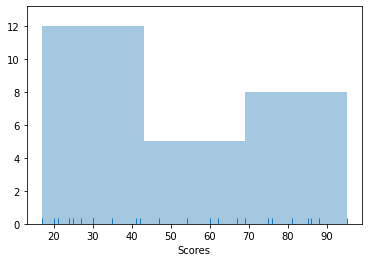

In [12]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde=False, rug=True)
plt.show()

# Performing Simple Linear Regression

### Calculating the coeffeciants of the simple linear regression equation: y = B0 + B1.x (B1: Slope, B0: Intercept)

In [15]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [16]:
B1

9.775803390787475

In [17]:
B0 = mean_y - B1*mean_x

In [18]:
B0

2.4836734053731746

### Making Predictions

In [19]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [20]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

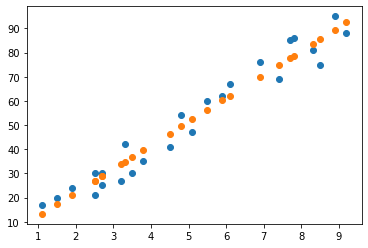

In [21]:
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

### Prediction of given value: 9.25

In [22]:
B0 + B1*9.25

92.90985477015732

In [23]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_Scores'].values)

### RMSE

In [ ]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y

In [ ]:
rmse

0.10439521325937494

# OLS Model

In [ ]:
model = smf.ols('Scores ~ Hours', data = df)
model = model.fit()

In [ ]:
df['pred_ols'] = model.predict(df['Hours'])

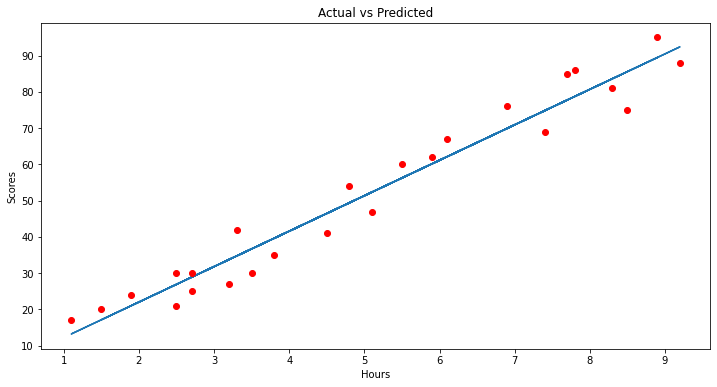

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Hours'], df['pred_ols'])     # regression line
plt.plot(df['Hours'], df['Scores'], 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

### We can observe that the predicted value for 9.25 hours is around 92

# Additional conclusions: Categorical Prediction

In [ ]:
# Consider a threshold to come to a conclusion whether the student passed or not!
# Let's consider here 40 as the cut-off to pass.

cut_off = 40

In [ ]:
df['Result'] = df['Scores']>=40

In [ ]:
df.head()

,Hours,Scores,predicted_Scores,pred_ols,Result
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


### Feature Engineering

In [ ]:
feature = df['Hours'].values.reshape(-1, 1)
target = df['Result'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

### Training the KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Accuracy

In [ ]:
knn.score(X_train, y_train)

0.9444444444444444

In [ ]:
knn.score(X_test, y_test)

0.8571428571428571

### Predicting the outcomes

In [ ]:
get_results = [[9.25]]

In [ ]:
knn.predict(get_results)

array([ True])

In [ ]:
knn.predict([[14]])

array([ True])

In [ ]:
knn.predict([[3]])

array([False])